In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
%matplotlib inline


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
reduction_quan = pd.read_excel('../../data/tidy/20240920_130435.xlsx')

In [8]:
reduction_quan

,Unnamed: 0,Scenario,"Electricity Production and Consumption, 30% reduction in the industrial electricity emissions","Electricity Production and Consumption, 10% reduction in the industrial electricity emissions","Electricity Production and Consumption, 10% reduction in the regional emissions factors","Electricity Production and Consumption, 15% reduction in the regional emissions factors","Electricity Production and Consumption, 20% reduction in the regional emissions factors","Electricity Production and Consumption, 30% reduction in the regional emissions factors","Electricity Production and Consumption, 40% reduction in wastewater emissions","Energy Efficiency in Buildings, 50% reduction in the regional electricity emissions factors",...,"Mobility and transportation, 40% passenger cars are replaced by electric vehicles","Mobility and transportation, 40% trucks are replaced by electric vehicles","Mobility and transportation, 5% increase in bus mileage and 10% decrease in passenger car mileage","Mobility and transportation, 5% increase in bus mileage and 5% decrease in passenger car mileage","Mobility and transportation, 5% reduction in the total vehicle emissions due to remote working schedule","Mobility and transportation, 5% trucks are in municipal fleet and adopting the hydrogen as the fuel sources; all hydrogen powered car are fuel cell electric cars, zero tailpipe emissions","Mobility and transportation, Idling reduces the MPG by 10 percent for any types of vehicles (most influence the carbon dioxide emissions) ; 5% percent of the passenger cars, and 5% of the trucks and all buses are from municipal fleet","Working Lands & Forestry, 10% increase in forest land area","Working Lands & Forestry, 20% increase in forest land area","Working Lands & Forestry, 20% reduction in agricultural emissions"
0,0,B.a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,B.b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,B.c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,B.d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,B.e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,B.f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,B.g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,B.h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,B.i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,B.j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.363754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Melt the DataFrame, moving all values into a single column
df_melted = pd.melt(reduction_quan, id_vars=["Unnamed: 0", "Scenario"], var_name="Assumption", value_name="Value")

# Drop rows where the 'Value' is NaN
df_melted = df_melted.dropna(subset=["Value"])

# Reset index and drop the old index column if not needed
df_melted.reset_index(drop=True, inplace=True)

df_melted

,Unnamed: 0,Scenario,Assumption,Value
0,16,E.g,"Electricity Production and Consumption, 30% r...",3.323925
1,15,E.f,"Electricity Production and Consumption, 10% re...",1.107975
2,10,E.a,"Electricity Production and Consumption, 10% re...",2.072751
3,11,E.b,"Electricity Production and Consumption, 15% re...",3.109126
4,12,E.c,"Electricity Production and Consumption, 20% re...",4.145502
5,13,E.d,"Electricity Production and Consumption, 30% re...",6.218252
6,14,E.e,"Electricity Production and Consumption, 40% re...",0.585486
7,9,B.j,"Energy Efficiency in Buildings, 50% reduction ...",10.363754
8,6,B.g,"Energy Efficiency in Buildings, commerical bui...",1.513255
9,7,B.h,"Energy Efficiency in Buildings, commerical bui...",3.026511


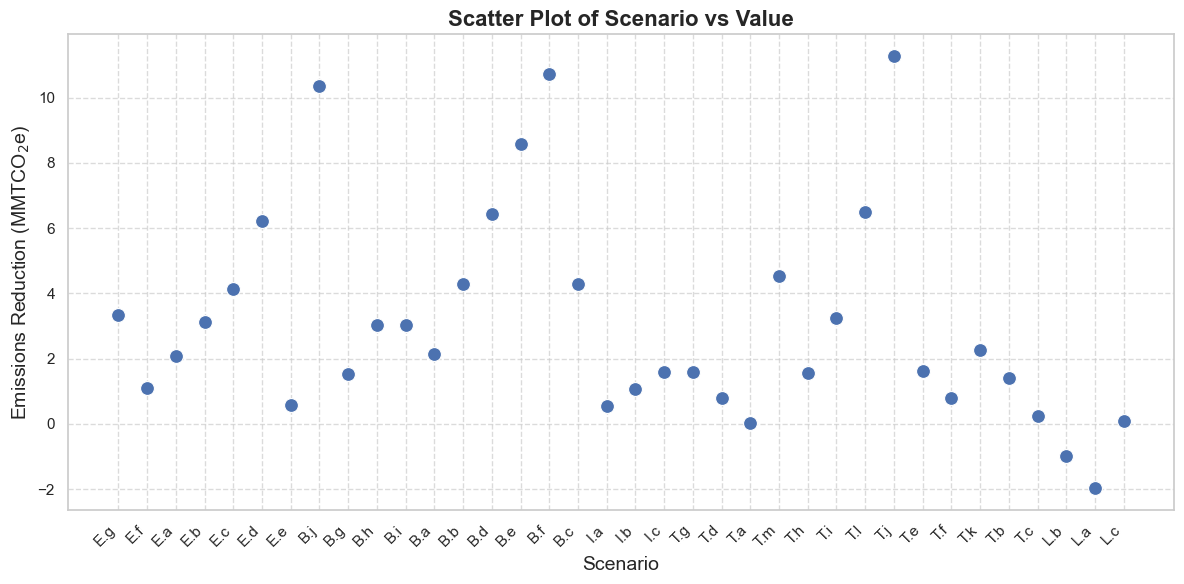

In [15]:
# Set up the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='Scenario', y='Value', data=df_melted, s=100, color='b', marker='o')

# Add titles and labels
plt.title('Scatter Plot of Scenario vs Value', fontsize=16, fontweight='bold')
plt.xlabel('Scenario', fontsize=14)
plt.ylabel('Emissions Reduction (MMTCO$_2$e)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve the plot aesthetics
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

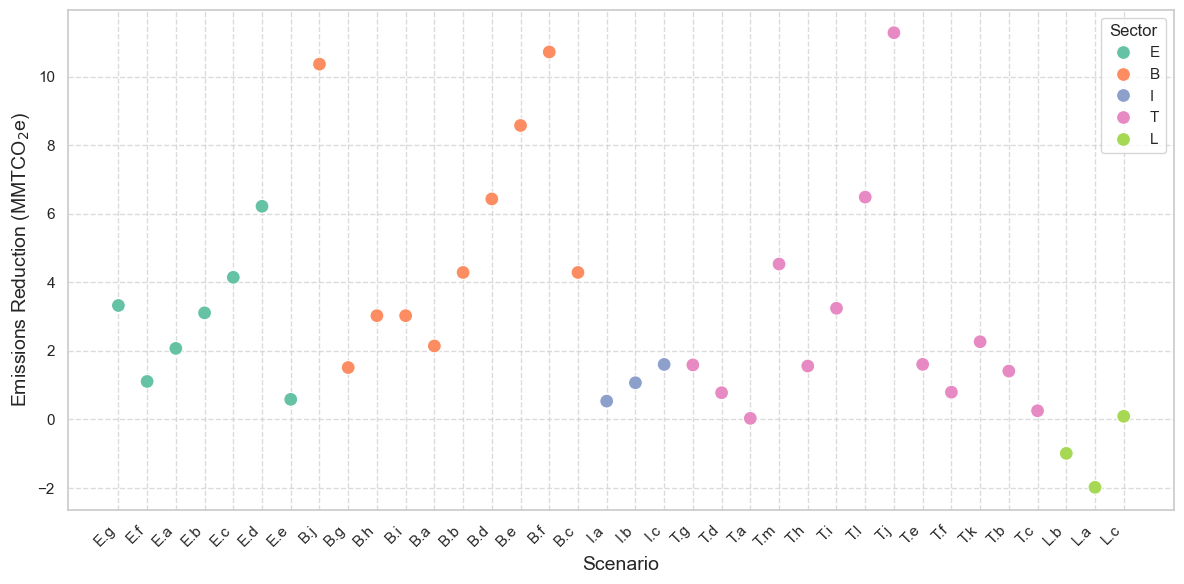

In [20]:
# Create a new column that extracts the first letter of each Scenario (group)
df_melted['Sector'] = df_melted['Scenario'].str[0]

# Set up the style
sns.set(style="whitegrid")

# Create the scatter plot, using 'hue' to color by the 'Group' column
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='Scenario', y='Value', hue='Sector', data=df_melted, s=100, palette='Set2', marker='o')

# Add titles and labels
# plt.title('Scatter Plot of Scenario vs Value by Group', fontsize=16, fontweight='bold')
plt.xlabel('Scenario', fontsize=14)
plt.ylabel('Emissions Reduction (MMTCO$_2$e)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve the plot aesthetics
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()